In [1]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import time
from typing import List, Dict, Tuple
import pandas as pd

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

class SyntacticAnalyzer:
    def extract_dependency_patterns(self, doc) -> List[Dict]:
        patterns = []
        for token in doc:
            pattern = {
                'token': token.text,
                'dep': token.dep_,
                'head': token.head.text,
                'children': [child.text for child in token.children]
            }
            patterns.append(pattern)
        return patterns
    
    def extract_syntactic_features(self, doc) -> Dict:
        return {
            'sentence_count': len(list(doc.sents)),
            'noun_phrases': list(doc.noun_chunks),
            'verbs': [token.text for token in doc if token.pos_ == 'VERB'],
            'clause_count': len([token for token in doc if token.dep_ == 'ROOT'])
        }

class StructuralAnalyzer:
    def create_dependency_graph(self, doc) -> nx.DiGraph:
        edges = []
        for token in doc:
            edges.append((token.head.text, token.text, {'label': token.dep_}))
        
        G = nx.DiGraph()
        G.add_edges_from(edges)
        return G
    
    def visualize_structure(self, G: nx.DiGraph, title: str):
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=2000, font_size=10, font_weight='bold')
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.show()

# Test the implementation
sample_texts = [
    """The ancient manuscript revealed hidden secrets. 
    Scholars carefully decoded its symbols. 
    The revelation changed historical understanding.""",
    
    """Complex algorithms process massive datasets.
    Machine learning models identify patterns.
    Results provide valuable insights."""
]

# Initialize analyzers
syntactic_analyzer = SyntacticAnalyzer()
structural_analyzer = StructuralAnalyzer()

# Analysis and performance testing
performance_metrics = []
for i, text in enumerate(sample_texts):
    print(f"\nAnalyzing Text {i+1}:")
    
    # Time the analysis
    start_time = time.time()
    
    # Process text
    doc = nlp(text)
    
    # Extract patterns and features
    patterns = syntactic_analyzer.extract_dependency_patterns(doc)
    features = syntactic_analyzer.extract_syntactic_features(doc)
    
    # Create and visualize dependency graph
    G = structural_analyzer.create_dependency_graph(doc)
    structural_analyzer.visualize_structure(G, f"Dependency Structure - Text {i+1}")
    
    # Calculate processing time
    processing_time = time.time() - start_time
    
    # Print analysis results
    print("\nSyntactic Features:")
    for key, value in features.items():
        print(f"{key}: {value}")
        
    print(f"\nFound {len(patterns)} dependency patterns")
    
    # Record performance
    performance_metrics.append({
        'text_id': i+1,
        'text_length': len(text),
        'sentence_count': features['sentence_count'],
        'pattern_count': len(patterns),
        'processing_time': processing_time
    })

# Display performance summary
performance_df = pd.DataFrame(performance_metrics)
print("\nPerformance Summary:")
print(performance_df)

# Calculate and display statistics
print("\nAnalysis Statistics:")
print(f"Average processing time: {performance_df['processing_time'].mean():.4f} seconds")
print(f"Processing time per character: {(performance_df['processing_time'] / performance_df['text_length']).mean():.6f} seconds")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
from metagpt.tools.libs.terminal import Terminal
terminal = Terminal()
print("Installing/upgrading required packages...")
await terminal.run('pip install -U spacy numpy')
await terminal.run('python -m spacy download en_core_web_sm')

import spacy
import networkx as nx
import matplotlib.pyplot as plt
import time
from typing import List, Dict, Tuple

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

class SyntacticAnalyzer:
    def extract_dependency_patterns(self, doc) -> List[Dict]:
        patterns = []
        for token in doc:
            pattern = {
                'token': token.text,
                'dep': token.dep_,
                'head': token.head.text,
                'children': [child.text for child in token.children]
            }
            patterns.append(pattern)
        return patterns
    
    def extract_syntactic_features(self, doc) -> Dict:
        return {
            'sentence_count': len(list(doc.sents)),
            'noun_phrases': list(doc.noun_chunks),
            'verbs': [token.text for token in doc if token.pos_ == 'VERB'],
            'clause_count': len([token for token in doc if token.dep_ == 'ROOT'])
        }

class StructuralAnalyzer:
    def create_dependency_graph(self, doc) -> nx.DiGraph:
        edges = []
        for token in doc:
            edges.append((token.head.text, token.text, {'label': token.dep_}))
        
        G = nx.DiGraph()
        G.add_edges_from(edges)
        return G
    
    def visualize_structure(self, G: nx.DiGraph, title: str):
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=2000, font_size=10, font_weight='bold')
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.show()

# Test the implementation
sample_texts = [
    """The ancient manuscript revealed hidden secrets. 
    Scholars carefully decoded its symbols. 
    The revelation changed historical understanding.""",
    
    """Complex algorithms process massive datasets.
    Machine learning models identify patterns.
    Results provide valuable insights."""
]

# Initialize analyzers
syntactic_analyzer = SyntacticAnalyzer()
structural_analyzer = StructuralAnalyzer()

# Analysis and performance testing
performance_metrics = []
total_processing_time = 0
total_chars = 0

for i, text in enumerate(sample_texts):
    print(f"\nAnalyzing Text {i+1}:")
    
    # Time the analysis
    start_time = time.time()
    
    # Process text
    doc = nlp(text)
    
    # Extract patterns and features
    patterns = syntactic_analyzer.extract_dependency_patterns(doc)
    features = syntactic_analyzer.extract_syntactic_features(doc)
    
    # Create and visualize dependency graph
    G = structural_analyzer.create_dependency_graph(doc)
    structural_analyzer.visualize_structure(G, f"Dependency Structure - Text {i+1}")
    
    # Calculate processing time
    processing_time = time.time() - start_time
    
    # Print analysis results
    print("\nSyntactic Features:")
    for key, value in features.items():
        print(f"{key}: {value}")
        
    print(f"\nFound {len(patterns)} dependency patterns")
    
    # Record performance
    metrics = {
        'text_id': i+1,
        'text_length': len(text),
        'sentence_count': features['sentence_count'],
        'pattern_count': len(patterns),
        'processing_time': processing_time
    }
    performance_metrics.append(metrics)
    
    # Update totals
    total_processing_time += processing_time
    total_chars += len(text)

# Display performance summary
print("\nPerformance Summary:")
for metrics in performance_metrics:
    print(f"\nText {metrics['text_id']}:")
    print(f"Length: {metrics['text_length']} chars")
    print(f"Sentences: {metrics['sentence_count']}")
    print(f"Patterns: {metrics['pattern_count']}")
    print(f"Processing time: {metrics['processing_time']:.4f} seconds")

# Calculate and display statistics
print("\nAnalysis Statistics:")
print(f"Average processing time: {total_processing_time/len(sample_texts):.4f} seconds")
print(f"Processing time per character: {total_processing_time/total_chars:.6f} seconds")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')

Analyzing Text 1:

Syntactic Features:
sentence_count: 3
noun_phrases: [The ancient manuscript, hidden secrets, Scholars, its symbols, The revelation, historical understanding]
verbs: ['revealed', 'hidden', 'decoded', 'changed']
clause_count: 3

Found 21 dependency patterns

Analyzing Text 2:

Syntactic Features:
sentence_count: 3
noun_phrases: [Complex algorithms process massive datasets, Machine learning models, patterns, Results, valuable insights]
verbs: ['identify', 'provide']
clause_count: 3

Found 19 dependency patterns

Performance Summary:

Text 1:
Length: 146 chars
Sentences: 3
Patterns: 21
Processing time: 0.5307 seconds

Text 2:
Length: 130 chars
Sentences: 3
Patterns: 19
Processing time: 0.2945 seconds

Analysis Statistics:
Average processing time: 0.4126 seconds
Processing time per character:

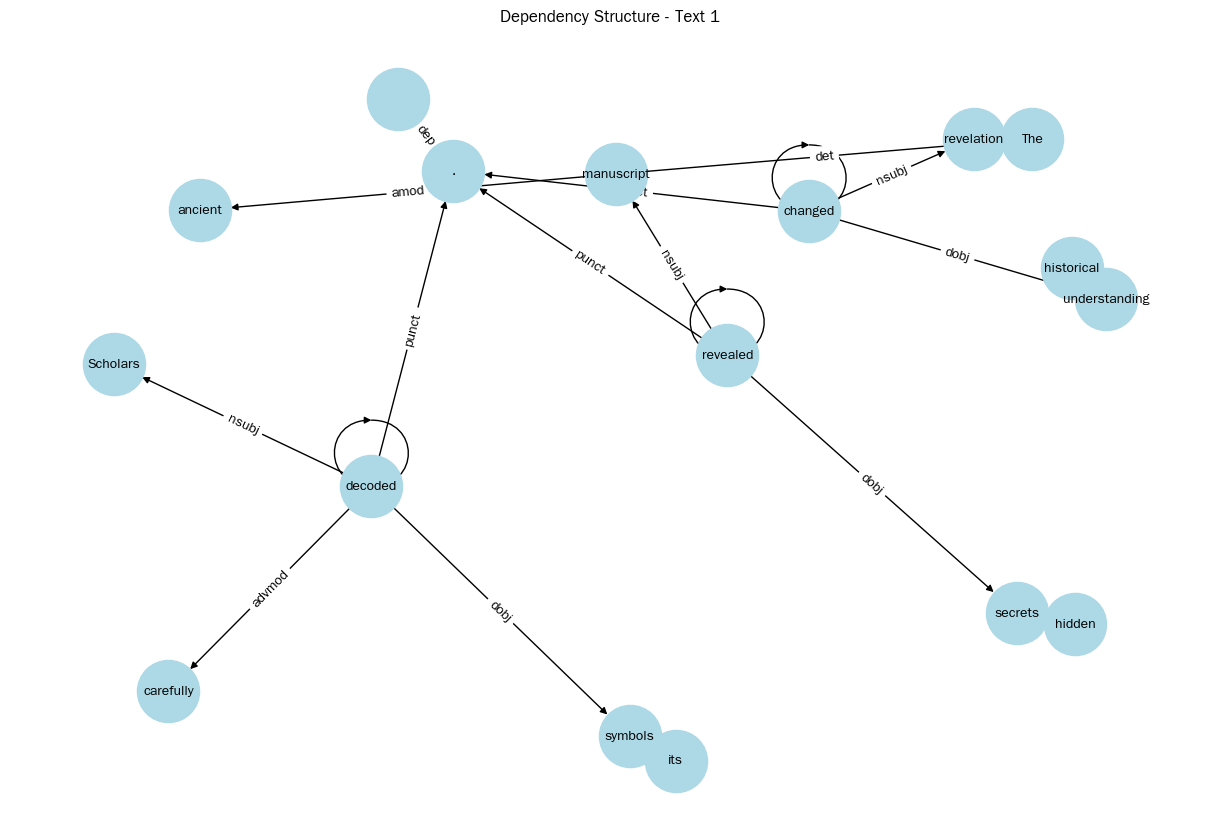

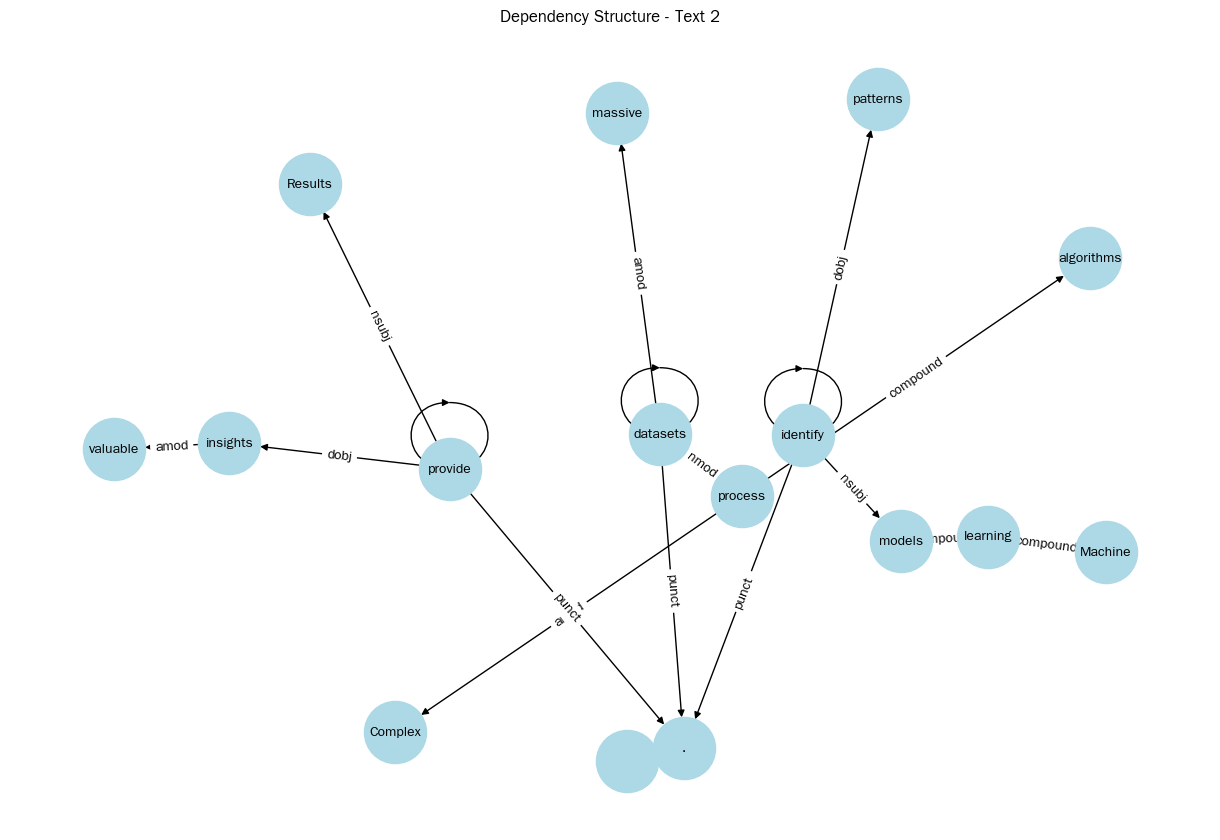

In [3]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import time
import statistics
from typing import List, Dict, Tuple
import subprocess
import sys

# Install required packages using subprocess directly
def install_packages():
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "spacy"])
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])

install_packages()

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

class SyntacticAnalyzer:
    def extract_dependency_patterns(self, doc) -> List[Dict]:
        patterns = []
        for token in doc:
            pattern = {
                'token': token.text,
                'dep': token.dep_,
                'head': token.head.text,
                'children': [child.text for child in token.children]
            }
            patterns.append(pattern)
        return patterns
    
    def extract_syntactic_features(self, doc) -> Dict:
        return {
            'sentence_count': len(list(doc.sents)),
            'noun_phrases': list(doc.noun_chunks),
            'verbs': [token.text for token in doc if token.pos_ == 'VERB'],
            'clause_count': len([token for token in doc if token.dep_ == 'ROOT'])
        }

class StructuralAnalyzer:
    def create_dependency_graph(self, doc) -> nx.DiGraph:
        edges = []
        for token in doc:
            edges.append((token.head.text, token.text, {'label': token.dep_}))
        
        G = nx.DiGraph()
        G.add_edges_from(edges)
        return G
    
    def visualize_structure(self, G: nx.DiGraph, title: str):
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=2000, font_size=10, font_weight='bold')
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.show()

# Test the implementation
sample_texts = [
    """The ancient manuscript revealed hidden secrets. 
    Scholars carefully decoded its symbols. 
    The revelation changed historical understanding.""",
    
    """Complex algorithms process massive datasets.
    Machine learning models identify patterns.
    Results provide valuable insights."""
]

# Initialize analyzers
syntactic_analyzer = SyntacticAnalyzer()
structural_analyzer = StructuralAnalyzer()

# Analysis and performance testing
performance_metrics = []
total_processing_time = 0
total_chars = 0

for i, text in enumerate(sample_texts):
    print(f"\nAnalyzing Text {i+1}:")
    
    # Time the analysis
    start_time = time.time()
    
    # Process text
    doc = nlp(text)
    
    # Extract patterns and features
    patterns = syntactic_analyzer.extract_dependency_patterns(doc)
    features = syntactic_analyzer.extract_syntactic_features(doc)
    
    # Create and visualize dependency graph
    G = structural_analyzer.create_dependency_graph(doc)
    structural_analyzer.visualize_structure(G, f"Dependency Structure - Text {i+1}")
    
    # Calculate processing time
    processing_time = time.time() - start_time
    
    # Print analysis results
    print("\nSyntactic Features:")
    for key, value in features.items():
        print(f"{key}: {value}")
        
    print(f"\nFound {len(patterns)} dependency patterns")
    
    # Record performance
    metrics = {
        'text_id': i+1,
        'text_length': len(text),
        'sentence_count': features['sentence_count'],
        'pattern_count': len(patterns),
        'processing_time': processing_time
    }
    performance_metrics.append(metrics)
    
    # Update totals
    total_processing_time += processing_time
    total_chars += len(text)

# Display performance summary
print("\nPerformance Summary:")
for metrics in performance_metrics:
    print(f"\nText {metrics['text_id']}:")
    print(f"Length: {metrics['text_length']} chars")
    print(f"Sentences: {metrics['sentence_count']}")
    print(f"Patterns: {metrics['pattern_count']}")
    print(f"Processing time: {metrics['processing_time']:.4f} seconds")

# Calculate and display statistics
print("\nAnalysis Statistics:")
print(f"Average processing time: {total_processing_time/len(sample_texts):.4f} seconds")
print(f"Processing time per character: {total_processing_time/total_chars:.6f} seconds")
# Calculate additional statistics
processing_times = [m['processing_time'] for m in performance_metrics]
print(f"Processing time std dev: {statistics.stdev(processing_times):.4f} seconds")